In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil
from tensorflow.keras.models import Model, Sequential


In [18]:
ABS_PATH = os.path.abspath(os.path.join('D:', '/Data Playground/Academics/Research Project/Animaldir/Animals1'))
CLUSTER_PATH = os.path.abspath(os.path.join('D:', '/Data Playground/Academics/Research Project/Clusters'))

In [3]:
glob_dir = ABS_PATH + '/*.png'
images = [cv2.resize(cv2.imread(file), (224, 224)) for file in 
          glob.glob(glob_dir)]

paths = [file for file in glob.glob(glob_dir)]
images = np.array(np.float32(images).reshape(len(images), -1)/255)

In [10]:
model = tf.keras.applications.MobileNetV2(include_top=False,
weights="imagenet", input_shape=(224, 224, 3))

predictions = model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

In [11]:
k = 2
kmodel = KMeans(n_clusters = k, n_jobs=-1, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
os.makedirs(CLUSTER_PATH + "\output")

shutil.rmtree(CLUSTER_PATH + "\output")
for i in range(k):
    os.makedirs(CLUSTER_PATH + "\output\cluster" + str(i))
for i in range(len(paths)):
    shutil.copy2(paths[i], CLUSTER_PATH + "\output\cluster"+str(kpredictions[i]))

C:\Users\Midhun\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:\\Data Playground\\Academics\\Research Project\\MelSpectrograms\\output'

In [8]:
import gc
gc.collect()

4762

## MobileNetV2 - Without Target Training - Euclidean metric

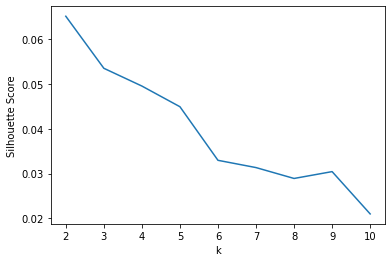

In [13]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   "euclidean"))
    kl.append(k)
plt.plot(kl, sil)
plt.ylabel("Silhouette Score")
plt.xlabel("k")
plt.show()

## MobileNetV2 - Without Target Training - Cosine metric

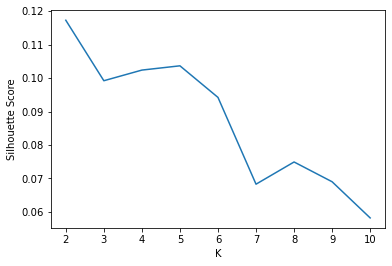

In [14]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   "cosine"))
    kl.append(k)
plt.plot(kl, sil)
plt.ylabel("Silhouette Score")
plt.xlabel("K")
plt.show()

In [15]:
distress_model = tf.keras.models.load_model('vgg16_base_res_20201125_2053.h5')


In [16]:
predictions = distress_model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

In [6]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   "euclidean"))
    kl.append(k)

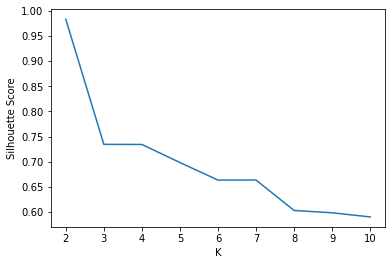

In [10]:
plt.plot(kl, sil)
plt.ylabel("Silhouette Score")
plt.xlabel("K")
plt.show()

In [20]:
k = 2
kmodel = KMeans(n_clusters = k, n_jobs=-1, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
os.makedirs(CLUSTER_PATH + "\output/best")

shutil.rmtree(CLUSTER_PATH + "\output/best")
for i in range(k):
    os.makedirs(CLUSTER_PATH + "\output/best/cluster" + str(i))
for i in range(len(paths)):
    shutil.copy2(paths[i], CLUSTER_PATH + "\output/best/cluster"+str(kpredictions[i]))

C:\Users\Midhun\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


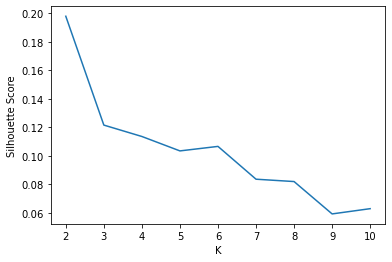

In [16]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   "cosine"))
    kl.append(k)
plt.plot(kl, sil)
plt.ylabel("Silhouette Score")
plt.xlabel("K")
plt.show()

In [11]:
vgg = tf.keras.applications.VGG16(include_top=False,
weights="imagenet", input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 40s 1us/step


In [13]:
predictions = vgg.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

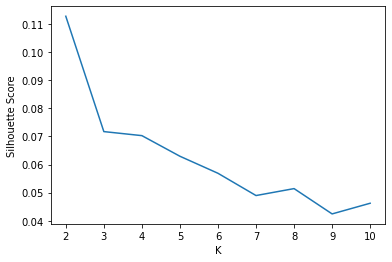

In [14]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   "euclidean"))
    kl.append(k)
plt.plot(kl, sil)
plt.ylabel("Silhouette Score")
plt.xlabel("K")
plt.show()

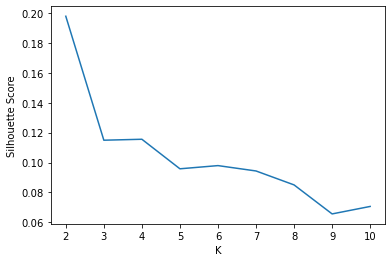

In [15]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   "cosine"))
    kl.append(k)
plt.plot(kl, sil)
plt.ylabel("Silhouette Score")
plt.xlabel("K")
plt.show()

In [4]:
distress_model = tf.keras.models.load_model('mobilenet_base_res.h5')


In [5]:
distress_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [6]:
targetted_model = Sequential()
for layer in distress_model.layers[:-1]: # go through until last layer
    targetted_model.add(layer)
targetted_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
Total params: 2,257,984
Trainable params: 0
Non-trainable params: 2,257,984
_________________________________________________________________


In [7]:
predictions = targetted_model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

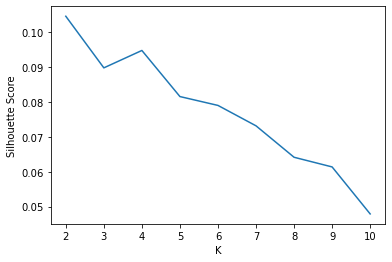

In [8]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   "euclidean"))
    kl.append(k)
plt.plot(kl, sil)
plt.ylabel("Silhouette Score")
plt.xlabel("K")
plt.show()

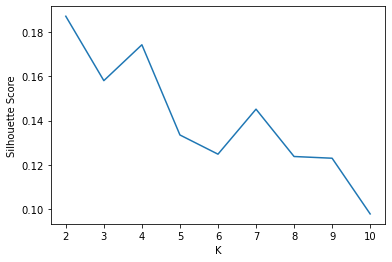

In [9]:
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric =   "cosine"))
    kl.append(k)
plt.plot(kl, sil)
plt.ylabel("Silhouette Score")
plt.xlabel("K")
plt.show()